# 17837번 새로운 게임 2 - Gold 2

#### 알고리즘 분류: 구현 , 시뮬레이션 


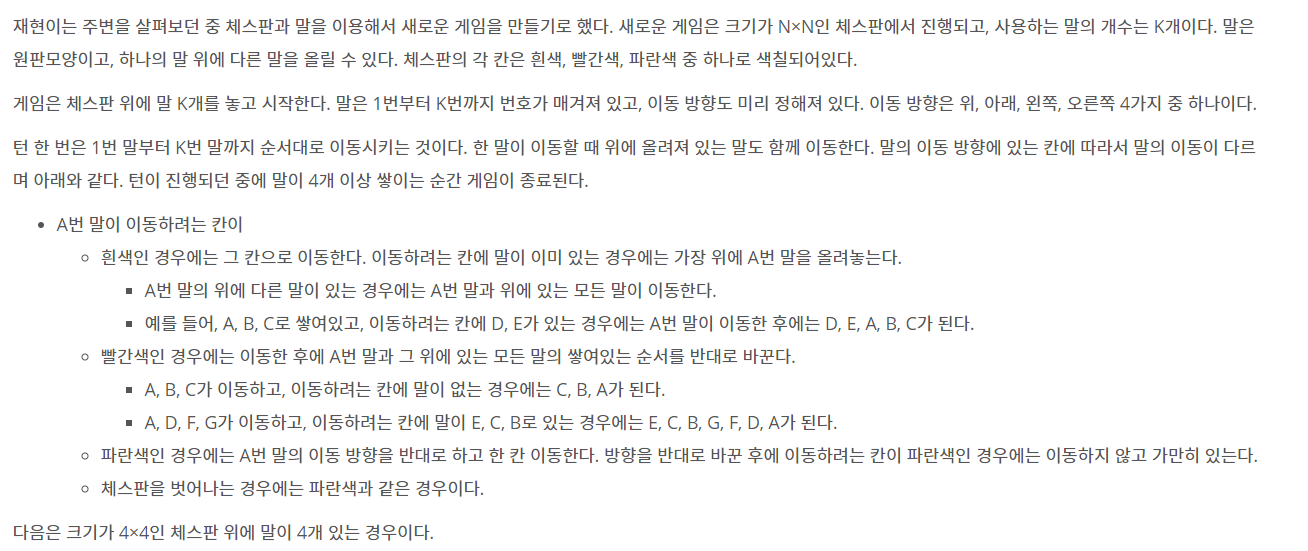

In [ ]:
n, k = map(int, input().split())
from collections import deque
import sys

board = [list(map(int, input().split())) for _ in range(n)]

piece = [[] for _ in range(k)]

direction = [0, [0, 1], [0, -1], [-1, 0], [1, 0]]
rev_dir = {1: 2, 2: 1, 3: 4, 4: 3}
seq_board = [[deque() for _ in range(n)] for _ in range(n)]
for i in range(k):
    y, x, d = list(map(int, input().split()))
    piece[i] = [y-1, x-1, d]
    seq_board[y-1][x-1].append(i)

turn = 0

while turn <= 1000:
    turn += 1

    for i in range(k):
        p_y, p_x, d = piece[i]

        dy, dx = direction[d]
        ny, nx = dy + p_y, dx + p_x
        if not (0 <= ny < n and 0 <= nx < n) or board[ny][nx] == 2:
            piece[i][2] = rev_dir[d]
            d = piece[i][2]
            dy, dx = direction[d]
            ny, nx = dy + p_y, dx + p_x



        if not (0 <= ny < n and 0 <= nx < n) or board[ny][nx] == 2:
            continue

        if 0 <= ny < n and 0 <= nx < n:
            if board[ny][nx] == 1 or board[ny][nx] == 0:
                idx = seq_board[p_y][p_x].index(i)
                temp = []

                for j in range(idx, len(seq_board[p_y][p_x])):
                    top_piece = seq_board[p_y][p_x].pop()
                    temp.append(top_piece)

                    piece[top_piece][0] = ny
                    piece[top_piece][1] = nx
                if board[ny][nx] == 1:
                    seq_board[ny][nx].extend(temp)

                elif board[ny][nx] == 0:
                    temp.reverse()
                    seq_board[ny][nx].extend(temp)
                if len(seq_board[ny][nx]) >= 4:
                    print(turn)
                    sys.exit()


print(-1)